# Supplemental Figure 1 (Deterministic model and dynamical regimes)
#### This file runs the deterministic model and recreates SFig 1B and 1C

In [1]:
from KeyFunctions.SimulationFunctions import *

import matplotlib.pyplot as plt
from matplotlib.colors import Normalize
import matplotlib.cm as cm
from matplotlib import colors
from mpl_toolkits.axes_grid1 import make_axes_locatable

### Default parameters for this file

In [2]:
# Steady state
r_bar = np.array([[30],[30],[35]])
r0 = r_bar # initial condition
r0Perturb = np.array([[30.5], [29.5], [35]])
      
# Time constants   
tau_E=15; tau_I=15 
tau = np.array([[tau_E], [tau_E], [tau_I]])

# Strength and structure of noise (no noise here)
sigE=0; sigI=0; c=0 

# 'Diffusion' matrix for the noise term
D_private = np.diag([np.sqrt(1-c)*sigE, np.sqrt(1-c)*sigE, sigI])
D_shared = np.array([np.sqrt(c)*sigE,np.sqrt(c)*sigE,0])
DMatrix = np.c_[D_private,D_shared]

# Connectivity parameters
Wee=1.15; alpha = 0.15
Wii=0.5; Wei=0.5; Wie=0.5
W = np.block([[Wee, alpha*Wee, -Wei],
              [alpha*Wee, Wee, -Wei],
              [Wie, Wie, -Wii]])

# Numerics
T=800
dt=0.01      

### Panel 1B (top)
#### Model Simulation in the stable regime

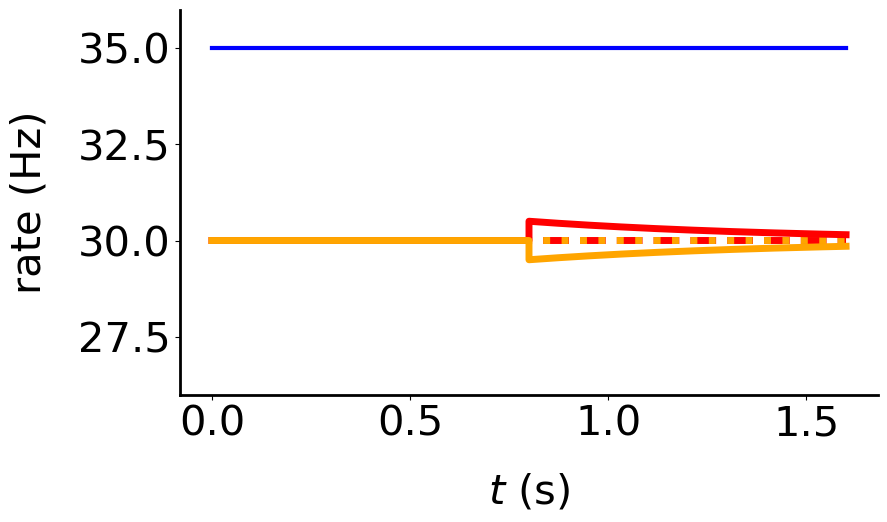

In [3]:
# Run the system at steady state for 0.8 seconds
Rates_firstPart, ts_first = global_inh_model(r0, r_bar, T, dt, W, tau, DMatrix)
# Perturb the system at 0.8 seconds
Rates_secondPart, ts_second = global_inh_model(r0Perturb, r_bar, T, dt, W, tau, DMatrix)

# Combine the two timeseries
RatesPerturbed = np.hstack((Rates_firstPart, Rates_secondPart))
# The unperturbed system simply continues at steady state
RatesUnperturbed = np.hstack((Rates_firstPart, Rates_firstPart))
timeVec = np.concatenate((ts_first, ts_second+ts_first[-1]+ts_second[1]))

# Create the plot
fig, ax = plt.subplots(figsize=(9,5))

ax.plot(timeVec, RatesUnperturbed[0,:], linewidth=5, linestyle='dashed', color='red', label=r'$\bar{r}_{E_1}$')
ax.plot(timeVec, RatesUnperturbed[1,:], linewidth=5, linestyle='dotted', color='orange', label=r'$\bar{r}_{E_2}$')

ax.plot(timeVec, RatesPerturbed[0,:], linewidth=5, linestyle='-', color='red')
ax.plot(timeVec, RatesPerturbed[1,:], linewidth=5, linestyle='-', color='orange')
ax.plot(timeVec, RatesPerturbed[2,:], linewidth=3, linestyle='-', color='blue', alpha=1)

ax.spines.left.set_linewidth(2)
ax.spines.bottom.set_linewidth(2)
ax.spines.right.set_color('none')
ax.spines.top.set_color('none')

ax.xaxis.set_tick_params(labelsize=30)
ax.yaxis.set_tick_params(labelsize=30)
ax.set_xlabel(r'$t$ (s)', fontsize=30, labelpad=20)
ax.set_ylabel(r'rate (Hz)', fontsize=30, labelpad=20)
ax.set_ylim(26,36)

plt.show()

### SFig. 1B (bottom)
#### Model simulation in the unstable, winner-take-all regime (shift $\alpha = 0.10$)
#### In this case, the global inhibition network is unstable, and exhibits winner-take-all dynamics

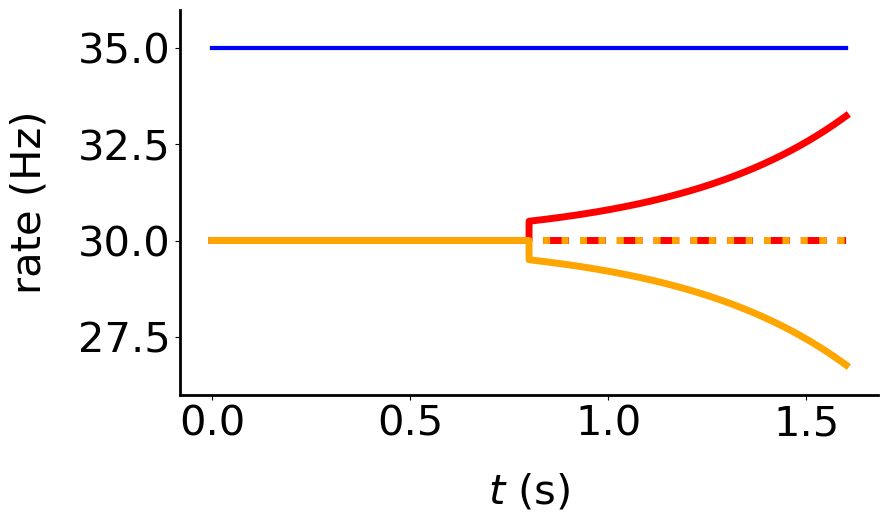

In [4]:
alpha = 0.1
W = np.block([[Wee, alpha*Wee, -Wei],
              [alpha*Wee, Wee, -Wei],
              [Wie, Wie, -Wii]])

# Run the system at steady state for 0.8 seconds
Rates_firstPart, ts_first = global_inh_model(r0,r_bar, T, dt, W, tau, DMatrix)
# Perturb the system at 0.8 seconds
Rates_secondPart, ts_second = global_inh_model(r0Perturb,r_bar, T, dt, W, tau, DMatrix)

# Combine the two timeseries
RatesPerturbed = np.hstack((Rates_firstPart, Rates_secondPart))
# The unperturbed system simply continues at steady state
RatesUnperturbed = np.hstack((Rates_firstPart, Rates_firstPart))
timeVec = np.concatenate((ts_first, ts_second+ts_first[-1]+ts_second[1]))

# Create the plot
fig, ax = plt.subplots(figsize=(9,5))

ax.plot(timeVec, RatesUnperturbed[0,:], linewidth=5, linestyle='dashed', color='red', label=r'$\bar{r}_{E_1}$')
ax.plot(timeVec, RatesUnperturbed[1,:], linewidth=5, linestyle='dotted', color='orange', label=r'$\bar{r}_{E_2}$')

ax.plot(timeVec, RatesPerturbed[0,:], linewidth=5, linestyle='-', color='red')
ax.plot(timeVec, RatesPerturbed[1,:], linewidth=5, linestyle='-', color='orange')
ax.plot(timeVec, RatesPerturbed[2,:], linewidth=3, linestyle='-', color='blue', alpha=1)

ax.spines.left.set_linewidth(2)
ax.spines.bottom.set_linewidth(2)
ax.spines.right.set_color('none')
ax.spines.top.set_color('none')

ax.xaxis.set_tick_params(labelsize=30)
ax.yaxis.set_tick_params(labelsize=30)
ax.set_xlabel(r'$t$ (s)', fontsize=30, labelpad=20)
ax.set_ylabel(r'rate (Hz)', fontsize=30, labelpad=20)
ax.set_ylim(26,36)

plt.show()

### SFig. 1C
#### Parameter regimes for the non-ISN, ISN, and unstable (winner-take-all) states

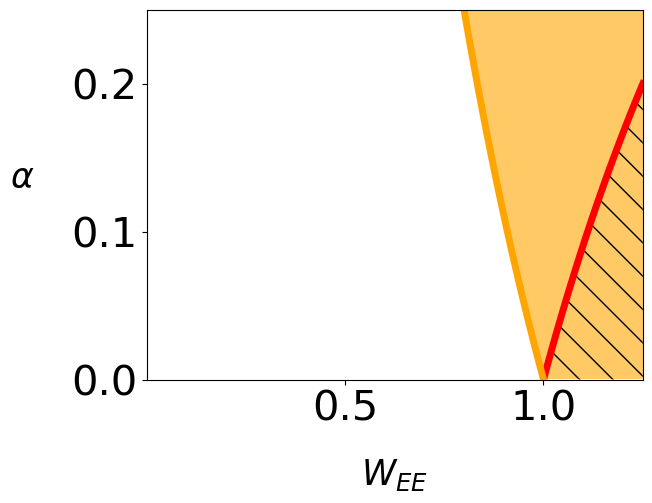

In [5]:
num = 1000
mat1 = np.zeros((num,num))
mat2 = np.zeros((num,num))

alphas = np.linspace(0, .25, num)
Wees = np.linspace(0.001, 1.25, num)

for i in range(num):
    alpha = alphas[i]
    for j in range(num):
        Wee = Wees[j]
        if Wee > 1/(1+alpha): # ISN condition
            mat1[i,j] = 1
        if alpha < 1 - (1/Wee): # WTA dynamics condition
            mat2[i,j] = 1
            
WTA_mask = np.ma.masked_less(mat2, 1)


fig,ax = plt.subplots()
cmap = colors.ListedColormap(['white', 'orange'])
bounds=[0,.5]
norm = colors.BoundaryNorm(bounds, cmap.N)

im1 = ax.imshow(np.flip(mat1, axis=0), extent=[Wees[0],Wees[-1], alphas[0],alphas[-1]], aspect='auto', cmap=cmap, norm=norm, alpha=0.6)
ax.contourf(WTA_mask, extent=[Wees[0],Wees[-1], alphas[0],alphas[-1]], hatches='\\', alpha=0)

xs1 = np.linspace(1, Wees[-1])
ax.plot(xs1, 1-(1/xs1), linewidth=5, color='red')

xs2 = np.linspace(1/(1+alphas[-1]), 1)
ax.plot(xs2, 1/xs2 -1, linewidth=5, color='orange')

ax.xaxis.set_tick_params(labelsize=30)
ax.yaxis.set_tick_params(labelsize=30)
ax.set_xlabel(r'$W_{EE}$', fontsize=25, labelpad=20)
ax.set_ylabel(r'$\alpha$', rotation=0, fontsize=25, labelpad=35)

plt.show()